Sno: Serial number or identifier assigned to each record.

AGE: Age of the individual.

SEX: Gender of the individual (e.g., Male, Female).

CASTE_NAME: Caste name of the individual.

CATEGORY_CODE: Code representing a category.

CATEGORY_NAME: Name of the category.

SURGERY_CODE: Code representing the type of surgery.

SURGERY: Description of the surgery.

VILLAGE: Name of the village.

MANDAL_NAME: Name of the mandal.

DISTRICT_NAME: Name of the district.

PREAUTH_DATE: Date of preauthorization.

PREAUTH_AMT: Amount authorized during preauthorization.

CLAIM_DATE: Date of the insurance claim.

CLAIM_AMOUNT: Amount claimed in the insurance.

HOSP_NAME: Name of the hospital.

HOSP_TYPE: Type of hospital.

HOSP_DISTRICT: District where the hospital is located.

SURGERY_DATE: Date of the surgery.

DISCHARGE_DATE: Date of discharge.

Mortality Y / N: Indicates whether there was mortality (e.g., YES, NO).

MORTALITY_DATE: Date of mortality.

SRC_REGISTRATION: Source registration code.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

### Read dataset and display first 5 observations

In [69]:
df=pd.read_csv('Andhra_Health_Data.csv')
df=pd.read_csv('Andhra_Health_Data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Sno,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,03-08-2013 20:38,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,06-08-2013 00:00,07-09-2013 00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,06-08-2013 07:26,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,08-08-2013 00:00,09-09-2013 00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,09-08-2013 18:30,12500,22-03-2017 20:25,11500,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,15-08-2013 00:00,18-10-2013 00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,24-08-2013 19:37,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,24-08-2013 00:00,27-09-2013 00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,28-08-2013 17:03,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,31-08-2013 00:00,02-10-2013 00:00,NO,NaN,D


In [70]:
df.shape

(479688, 23)

### EDA

In [71]:
# Check datatypes of all variables
df.dtypes

Sno                  int64
AGE                  int64
SEX                 object
CASTE_NAME          object
CATEGORY_CODE       object
CATEGORY_NAME       object
SURGERY_CODE        object
SURGERY             object
VILLAGE             object
MANDAL_NAME         object
DISTRICT_NAME       object
PREAUTH_DATE        object
PREAUTH_AMT          int64
CLAIM_DATE          object
CLAIM_AMOUNT         int64
HOSP_NAME           object
HOSP_TYPE           object
HOSP_DISTRICT       object
SURGERY_DATE        object
DISCHARGE_DATE      object
Mortality Y / N     object
MORTALITY_DATE      object
SRC_REGISTRATION    object
dtype: object

In [72]:
# Description of numeric variables
df.describe()

,Sno,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.0000,479688.000000,479688.000000,479688.000000
mean,239844.5000,44.912264,30428.941698,27652.205861
std,138474.1423,18.961084,27441.592281,25951.706037
min,1.0000,0.000000,5.000000,2.000000
25%,119922.7500,34.000000,12500.000000,12500.000000
50%,239844.5000,47.000000,25000.000000,23200.000000
75%,359766.2500,59.000000,35000.000000,30600.000000
max,479688.0000,107.000000,520000.000000,520000.000000


In [73]:
# Description of categorical variables
df.describe(include=object)

,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,CLAIM_DATE,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
count,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,475128,479688,10122,479688
unique,6,6,29,29,925,923,11801,711,13,246084,4870,467,2,20,937,918,2,740,4
top,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-1,Visakhapatnam,East Godavari,27-12-2016 14:01,27-12-2017 21:43,Sri Venkateswara Institute Of Medical Sciences,C,Guntur,13-02-2017 00:00,29-05-2017 00:00,NO,04-01-2017 00:00,D
freq,260718,246164,74947,74947,65378,65378,3277,9264,55398,35,511,21854,369346,60988,1602,1764,469566,40,437948


In [74]:
# Drop unnecessary columns
df.drop(columns=['Sno','SURGERY_CODE','VILLAGE','MANDAL_NAME'],inplace=True)

In [75]:
# Find unique values in each variable
df.nunique()

AGE                    102
SEX                      6
CASTE_NAME               6
CATEGORY_CODE           29
CATEGORY_NAME           29
SURGERY                923
DISTRICT_NAME           13
PREAUTH_DATE        246084
PREAUTH_AMT           2007
CLAIM_DATE            4870
CLAIM_AMOUNT         11465
HOSP_NAME              467
HOSP_TYPE                2
HOSP_DISTRICT           20
SURGERY_DATE           937
DISCHARGE_DATE         918
Mortality Y / N          2
MORTALITY_DATE         740
SRC_REGISTRATION         4
dtype: int64

In [76]:
# Drop columns
df.drop(columns=['CATEGORY_CODE','SURGERY_DATE'],inplace=True)

In [77]:
# Missing Values
df.isnull().sum()/df.shape[0]

AGE                 0.000000
SEX                 0.000000
CASTE_NAME          0.000000
CATEGORY_NAME       0.000000
SURGERY             0.000000
DISTRICT_NAME       0.000000
PREAUTH_DATE        0.000000
PREAUTH_AMT         0.000000
CLAIM_DATE          0.000000
CLAIM_AMOUNT        0.000000
HOSP_NAME           0.000000
HOSP_TYPE           0.000000
HOSP_DISTRICT       0.000000
DISCHARGE_DATE      0.009506
Mortality Y / N     0.000000
MORTALITY_DATE      0.978899
SRC_REGISTRATION    0.000000
dtype: float64

In [78]:
# Fill values of MORTALITY_DATE to the DISCHARGE_DATE column 
df['DISCHARGE_DATE'].fillna(df['MORTALITY_DATE'],inplace=True)

- The "MORTALITY_DATE" column might contain information related to the discharge date, and combining these dates into the "DISCHARGE_DATE" column could help consolidate relevant information in a single column.

In [79]:
# Check null values
df.isnull().sum()/df.shape[0]

AGE                 0.000000
SEX                 0.000000
CASTE_NAME          0.000000
CATEGORY_NAME       0.000000
SURGERY             0.000000
DISTRICT_NAME       0.000000
PREAUTH_DATE        0.000000
PREAUTH_AMT         0.000000
CLAIM_DATE          0.000000
CLAIM_AMOUNT        0.000000
HOSP_NAME           0.000000
HOSP_TYPE           0.000000
HOSP_DISTRICT       0.000000
DISCHARGE_DATE      0.000002
Mortality Y / N     0.000000
MORTALITY_DATE      0.978899
SRC_REGISTRATION    0.000000
dtype: float64

- Dropping a column with a high percentage of missing values.

In [80]:
df.drop(columns='MORTALITY_DATE',inplace=True)

In [81]:
# Convert date into YYYY-MM-DD format
def clean(x):
    return x[0:10]
df['PREAUTH_DATE']=df['PREAUTH_DATE'].apply(clean)

In [82]:
def clean(x):
    return x[0:10]
df['CLAIM_DATE']=df['CLAIM_DATE'].apply(clean)

- Convert date strings in the "PREAUTH_DATE" and "CLAIM_DATE" columns from the "YYYY-MM-DD HH:MM" format to the "YYYY-MM-DD" format

In [83]:
df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_NAME,SURGERY,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION
0,56,Female,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,03-08-2013,12500,22-03-2017,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,07-09-2013 00:00,NO,D
1,37,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,06-08-2013,12500,22-03-2017,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,09-09-2013 00:00,NO,D
2,50,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,09-08-2013,12500,22-03-2017,11500,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,18-10-2013 00:00,NO,D
3,45,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,24-08-2013,12500,22-03-2017,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,27-09-2013 00:00,NO,D
4,54,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,28-08-2013,12500,22-03-2017,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,02-10-2013 00:00,NO,D


In [84]:
##changing to date time 

df['DISCHARGE_DATE'] = pd.to_datetime(df['DISCHARGE_DATE'], format='%d-%m-%Y %H:%M', errors='coerce')
df['PREAUTH_DATE'] = pd.to_datetime(df['PREAUTH_DATE'], format='%d-%m-%Y', errors='coerce')
df['CLAIM_DATE'] = pd.to_datetime(df['PREAUTH_DATE'], format='%d-%m-%Y', errors='coerce')
# Remove time information from 'DISCHARGE_DATE' 
df['DISCHARGE_DATE'] = df['DISCHARGE_DATE'].dt.floor('d')

## creating a new column days_stayed
df['DAYS_STAYED'] = (df['DISCHARGE_DATE'] - df['PREAUTH_DATE']).dt.days

df.head(20)

,AGE,SEX,CASTE_NAME,CATEGORY_NAME,SURGERY,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,DAYS_STAYED
0,56,Female,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,2013-08-03,12500,2013-08-03,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-09-07,NO,D,35.0
1,37,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,2013-08-06,12500,2013-08-06,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-09-09,NO,D,34.0
2,50,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,2013-08-09,12500,2013-08-09,11500,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-10-18,NO,D,70.0
3,45,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,2013-08-24,12500,2013-08-24,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-09-27,NO,D,34.0
4,54,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,2013-08-28,12500,2013-08-28,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-10-02,NO,D,35.0
5,35,Male,OC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,2013-08-28,12500,2013-08-28,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-10-02,NO,P,35.0
6,52,Male,OC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Kurnool,2013-08-30,12500,2013-08-30,11000,Govt General Hospital Kurnool,G,Kurnool,2013-10-02,NO,D,33.0
7,73,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Vizianagaram,2014-05-02,12500,2014-05-02,5000,Queens Nri Hospitals,C,Vishakhapatnam,2014-05-23,YES,D,21.0
8,56,Male,OC,CARDIAC AND CARDIOTHORACIC SURGERY,Coronary Balloon Angioplasty with stent(00.45),Guntur,2014-06-10,40000,2014-06-10,40000,Karumuri Hospital,C,Guntur,2014-06-16,NO,D,6.0
9,49,Male,OC,CARDIAC AND CARDIOTHORACIC SURGERY,Coronary Bypass Surgery,Guntur,2014-06-11,115846,2014-06-11,115846,Karumuri Hospital,C,Guntur,2014-06-25,NO,D,14.0


- Replaced 'PREAUTH_DATE' and 'CLAIM_DATE' and 'DISCHARGE_DATE' with your actual datatype. 
- The data type of these columns should be datetime64.

In [85]:
# Check datatypes after changing the datatypes
df.dtypes

AGE                          int64
SEX                         object
CASTE_NAME                  object
CATEGORY_NAME               object
SURGERY                     object
DISTRICT_NAME               object
PREAUTH_DATE        datetime64[ns]
PREAUTH_AMT                  int64
CLAIM_DATE          datetime64[ns]
CLAIM_AMOUNT                 int64
HOSP_NAME                   object
HOSP_TYPE                   object
HOSP_DISTRICT               object
DISCHARGE_DATE      datetime64[ns]
Mortality Y / N             object
SRC_REGISTRATION            object
DAYS_STAYED                float64
dtype: object

In [86]:
# Check null values
df.isnull().sum()

AGE                 0
SEX                 0
CASTE_NAME          0
CATEGORY_NAME       0
SURGERY             0
DISTRICT_NAME       0
PREAUTH_DATE        0
PREAUTH_AMT         0
CLAIM_DATE          0
CLAIM_AMOUNT        0
HOSP_NAME           0
HOSP_TYPE           0
HOSP_DISTRICT       0
DISCHARGE_DATE      3
Mortality Y / N     0
SRC_REGISTRATION    0
DAYS_STAYED         3
dtype: int64

In [87]:
# Fill null values with max()
df['DISCHARGE_DATE'].fillna(df['DISCHARGE_DATE'].max(),inplace=True)

In [88]:
# Fill null values with max()
df['DAYS_STAYED'].fillna(df['DAYS_STAYED'].max(),inplace=True)

In [89]:
# Check null values after filling the null values.
df.isnull().sum()

AGE                 0
SEX                 0
CASTE_NAME          0
CATEGORY_NAME       0
SURGERY             0
DISTRICT_NAME       0
PREAUTH_DATE        0
PREAUTH_AMT         0
CLAIM_DATE          0
CLAIM_AMOUNT        0
HOSP_NAME           0
HOSP_TYPE           0
HOSP_DISTRICT       0
DISCHARGE_DATE      0
Mortality Y / N     0
SRC_REGISTRATION    0
DAYS_STAYED         0
dtype: int64

In [90]:
# Replace values
df.SEX=df.SEX.replace(['Female', 'Female(Child)'], 'FEMALE')
df.SEX=df.SEX.replace(['Male', 'Male(Child)'], 'MALE')

In [91]:
df['SEX'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [92]:
# Select numeric columns
df_numeric=df.select_dtypes(include=np.number)

In [93]:
# Check skewness of numeric values
df_numeric.skew()

AGE            -0.574233
PREAUTH_AMT     2.826157
CLAIM_AMOUNT    3.089832
DAYS_STAYED     7.129508
dtype: float64

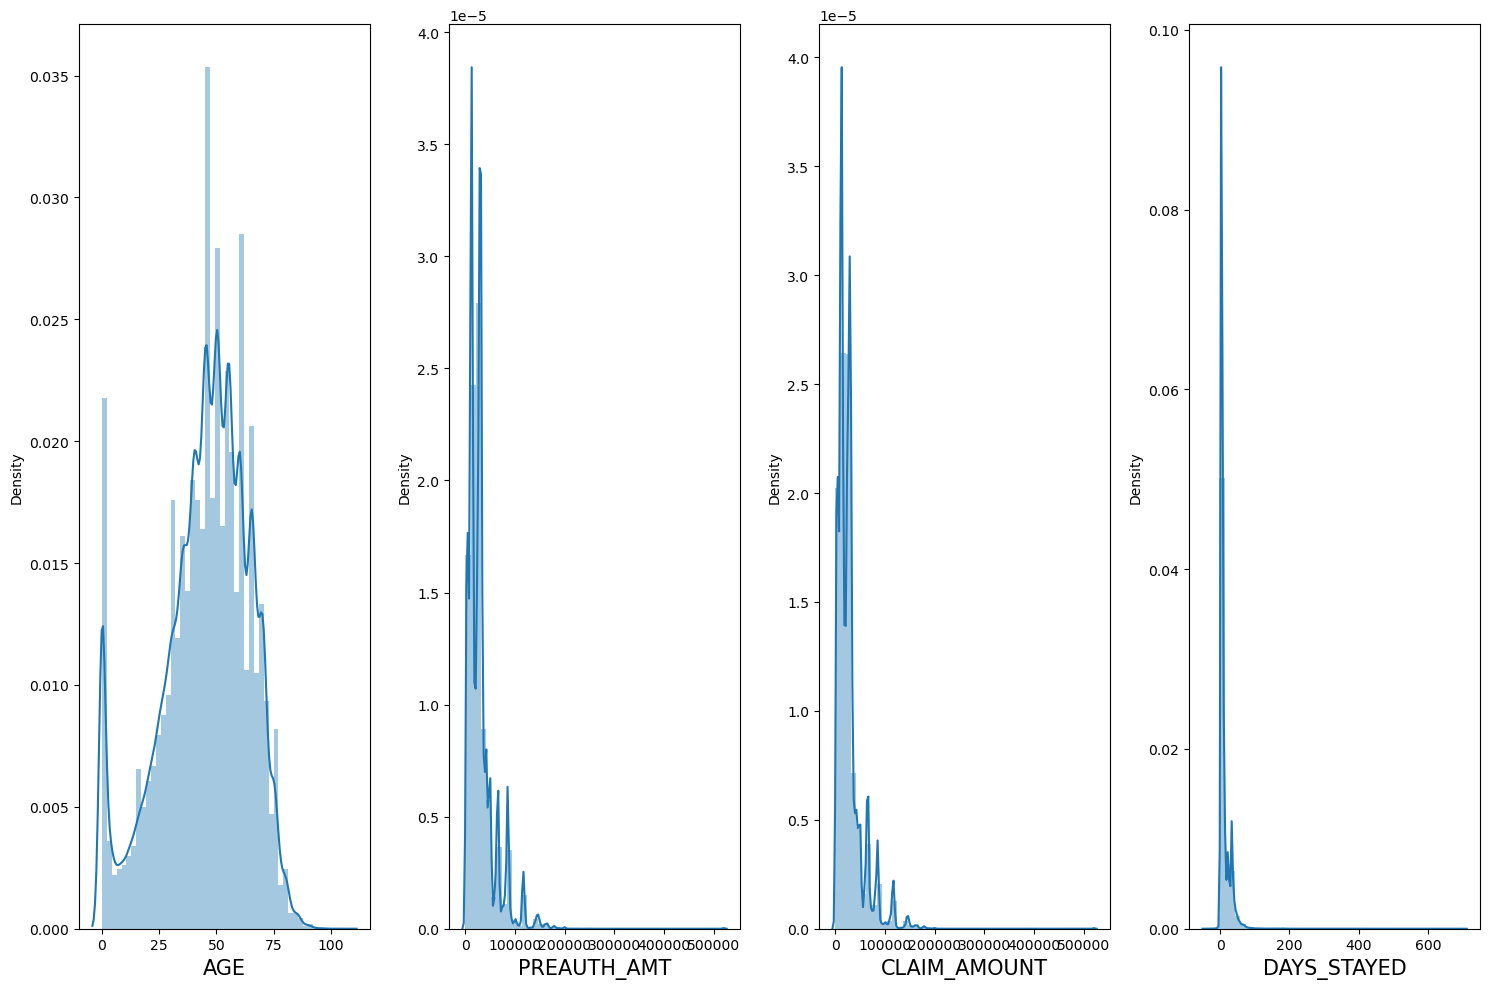

In [94]:
# Distribution of numerical columns
fig, ax = plt.subplots(1, 4, figsize=(15, 10))

for variable, subplot in zip(df_numeric, ax.flatten()):
    distplt = sns.distplot(x=df_numeric[variable], ax=subplot)
    distplt.set_xlabel(variable, fontsize = 15)
    
plt.tight_layout()   
plt.show() 

In [95]:
df_numeric.head()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED
0,56,12500,11000,35.0
1,37,12500,11000,34.0
2,50,12500,11500,70.0
3,45,12500,11000,34.0
4,54,12500,11000,35.0


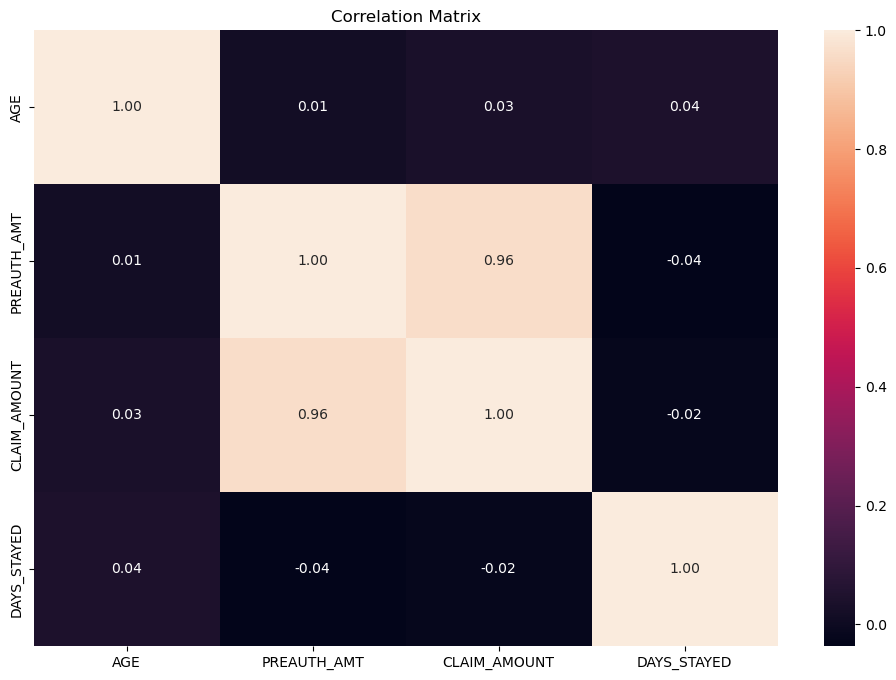

In [96]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [97]:
df.corr()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED
AGE,1.000000,0.013485,0.032526,0.042833
PREAUTH_AMT,0.013485,1.000000,0.959587,-0.036785
CLAIM_AMOUNT,0.032526,0.959587,1.000000,-0.024468
DAYS_STAYED,0.042833,-0.036785,-0.024468,1.000000


- AGE and PREAUTH_AMT (0.013485):
The correlation coefficient is close to zero, suggesting a very weak positive correlation between age and pre-authorization amount. In practical terms, age has little influence on pre-authorization amount.

- AGE and CLAIM_AMOUNT (0.032526):
Similarly, there is a very weak positive correlation between age and claim amount. Age has a minor influence on the claimed amount.

- AGE and DAYS_STAYED (0.042833):
There is a weak positive correlation between age and the number of days stayed. This suggests that, on average, older individuals might have slightly longer stays.

- PREAUTH_AMT and CLAIM_AMOUNT (0.959587):
There is a strong positive correlation between pre-authorization amount and claimed amount. This indicates that higher pre-authorization amounts are associated with higher claimed amounts.

- PREAUTH_AMT and DAYS_STAYED (-0.036785):
There is a very weak negative correlation between pre-authorization amount and the number of days stayed. This suggests that higher pre-authorization amounts are, on average, associated with slightly shorter stays.

- CLAIM_AMOUNT and DAYS_STAYED (-0.024468):
There is a very weak negative correlation between claimed amount and the number of days stayed. This implies that higher claimed amounts are, on average, associated with slightly shorter stays.

<Figure size 900x900 with 0 Axes>

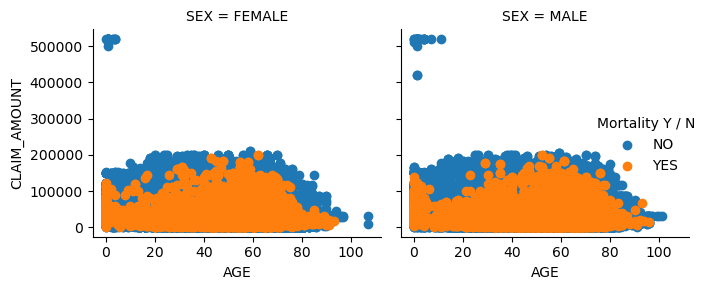

In [98]:
plt.figure(figsize=(9,9))
isurance_plot = sns.FacetGrid(df, hue='Mortality Y / N', col='SEX')
isurance_plot.map(plt.scatter, 'AGE', 'CLAIM_AMOUNT').add_legend()
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Surgery Category'}>

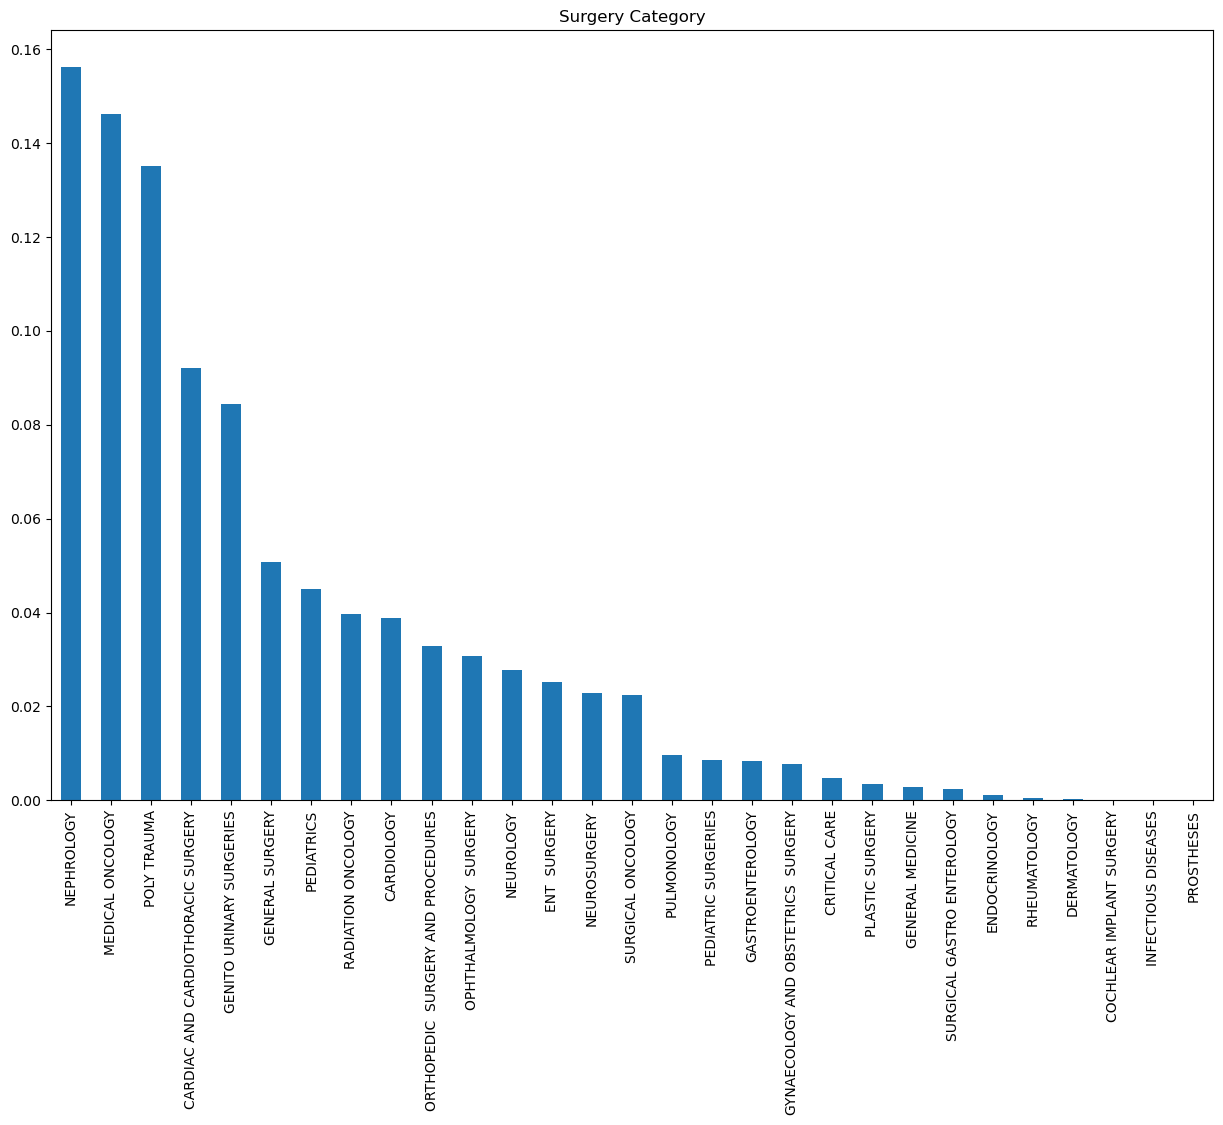

In [99]:
#Surgery Category
fig = plt.gcf()
fig.set_size_inches(15,10)
df['CATEGORY_NAME'].value_counts(normalize=True).plot.bar(title='Surgery Category')

<Axes: title={'center': 'Surgeries with Most Fatalities'}, xlabel='SURGERY'>

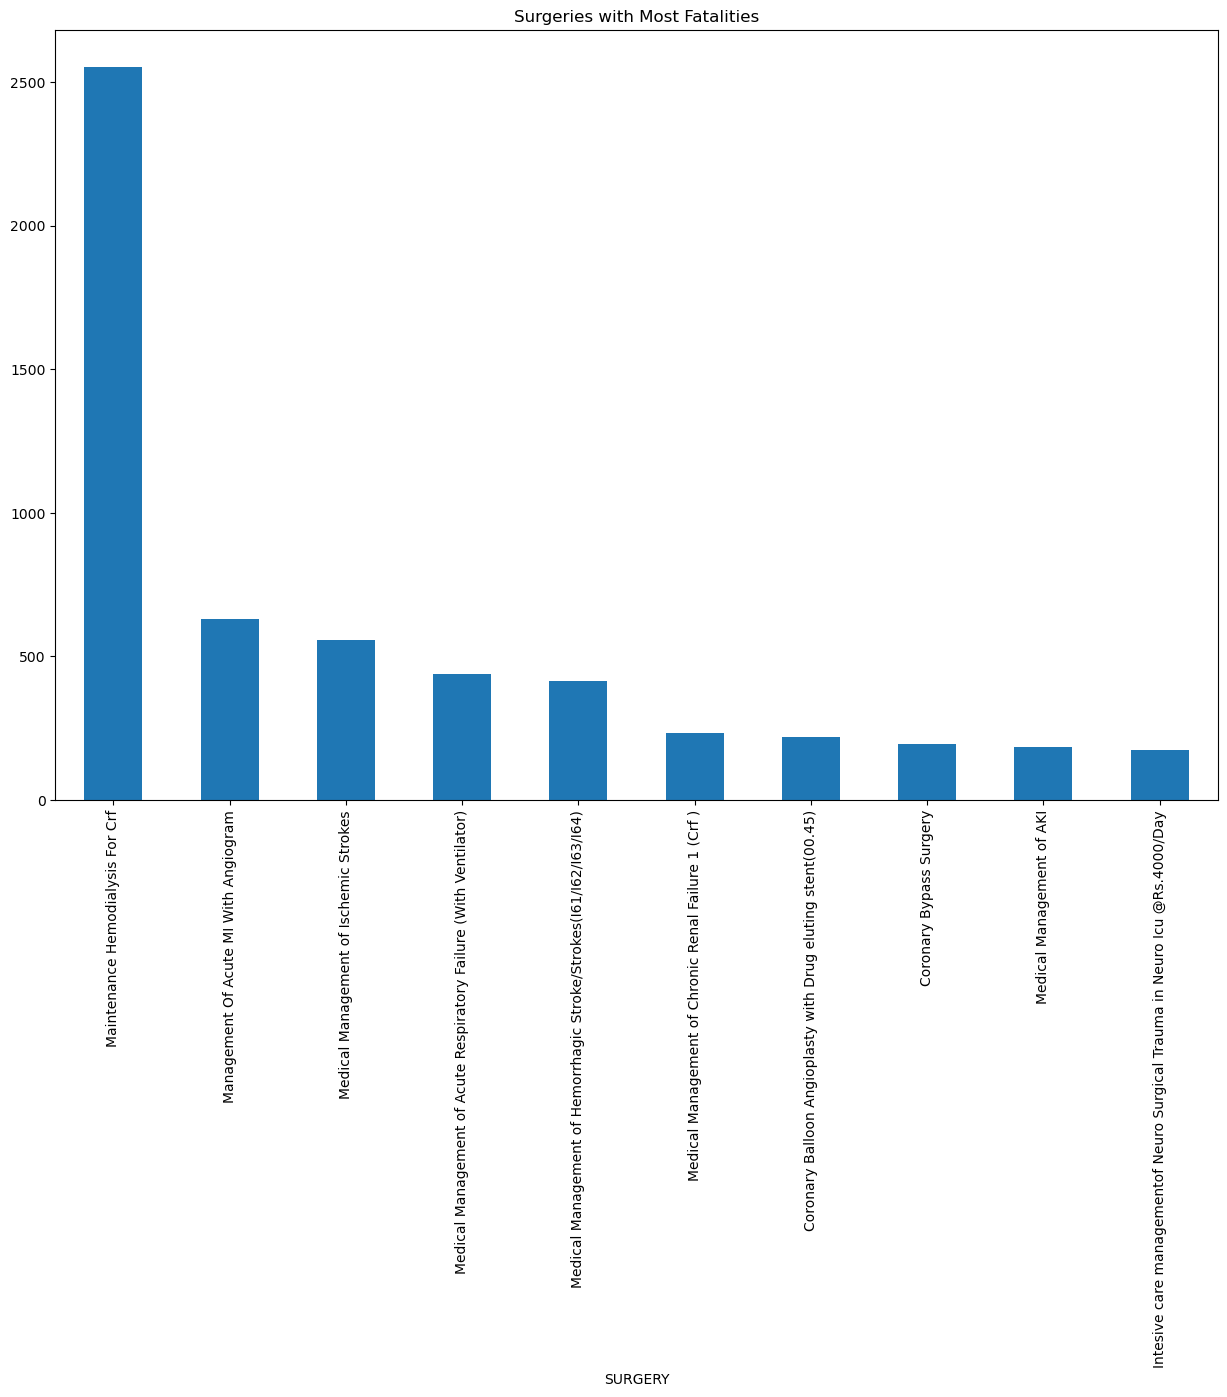

In [100]:
#Surgeries with Most Fatalities

fig = plt.gcf()
fig.set_size_inches(15,10)
fatalities = pd.crosstab(df['SURGERY'],df['Mortality Y / N'])
fatalities.sort_values(by=['YES'],ascending=False)[:10]['YES'].plot.bar(title= 'Surgeries with Most Fatalities')

In [101]:
df.drop(columns=['SURGERY'],inplace=True)

In [102]:
df.skew()

AGE            -0.574233
PREAUTH_AMT     2.826157
CLAIM_AMOUNT    3.089832
DAYS_STAYED     7.129508
dtype: float64

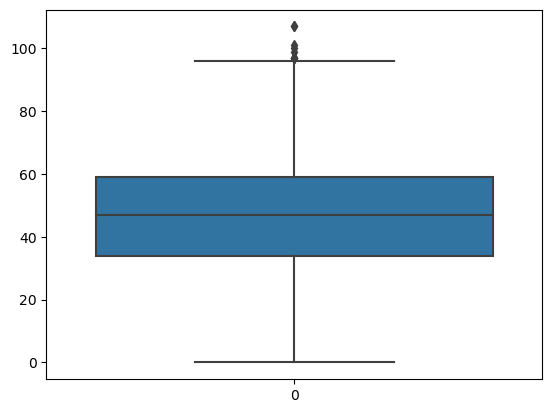

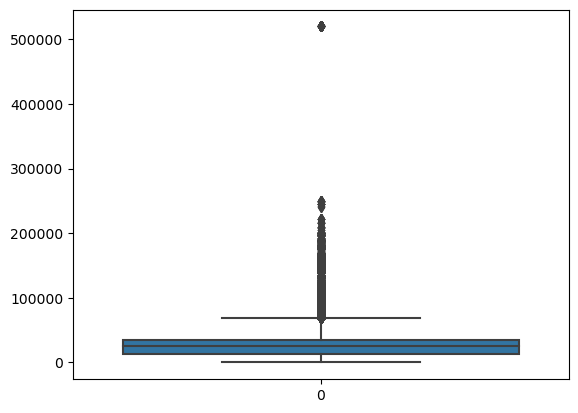

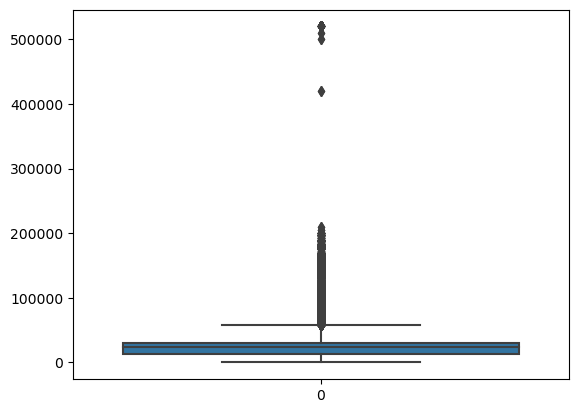

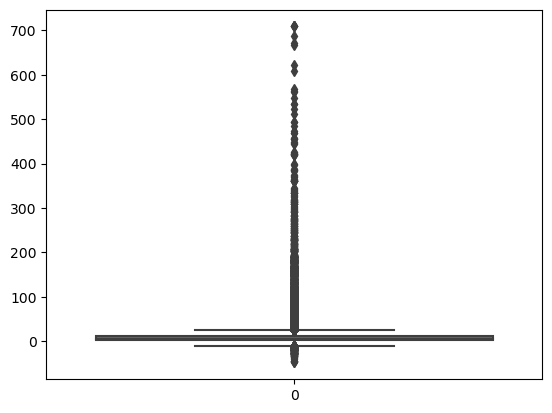

In [103]:
#Outliers
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

In [104]:
num=df.select_dtypes(include=np.number)
num.drop('CLAIM_AMOUNT', axis=1, inplace=True)

In [105]:
num.head()

,AGE,PREAUTH_AMT,DAYS_STAYED
0,56,12500,35.0
1,37,12500,34.0
2,50,12500,70.0
3,45,12500,34.0
4,54,12500,35.0


In [106]:
num=sm.add_constant(num)
vif_value=(VIF(num.values,i) for i in range(num.shape[1]))
pd.DataFrame(vif_value, columns=['VIF_Value'], index=num.columns).sort_values('VIF_Value', ascending=False)

,VIF_Value
const,8.173125
DAYS_STAYED,1.003241
AGE,1.002066
PREAUTH_AMT,1.001583


# Scaling

- Need to scale features depends on the specific requirements of the machine learning algorithm. Scaling is particularly important for algorithms that are sensitive to the scale of input features, such as those based on distance metrics (e.g., K-Nearest Neighbors) or optimization algorithms (e.g., Gradient Descent).



In [107]:
df.skew()

AGE            -0.574233
PREAUTH_AMT     2.826157
CLAIM_AMOUNT    3.089832
DAYS_STAYED     7.129508
dtype: float64

In [108]:
df_num=df.select_dtypes(include=np.number)

In [109]:
df_num.head()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED
0,56,12500,11000,35.0
1,37,12500,11000,34.0
2,50,12500,11500,70.0
3,45,12500,11000,34.0
4,54,12500,11000,35.0


- AGE: This variable represents age and is typically on a smaller scale.
- PREAUTH_AMT: This variable represents a monetary amount, and the scale depends on the currency. It could range from small   values to potentially large values.

- CLAIM_AMOUNT: Similar to PREAUTH_AMT, this variable represents a monetary amount and might have a similar scale.

- DAYS_STAYED: This variable represents the number of days, which is typically on a smaller scale.

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
mm=MinMaxScaler()
scaler=mm.fit_transform(df_num)
df_scaled=pd.DataFrame(scaler,columns=df_num.columns)
df_scaled.head()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED
0,0.523364,0.024029,0.021150,0.109643
1,0.345794,0.024029,0.021150,0.108322
2,0.467290,0.024029,0.022112,0.155878
3,0.420561,0.024029,0.021150,0.108322
4,0.504673,0.024029,0.021150,0.109643


- Min-Max scaling is just one of several scaling methods, and the choice of scaler depends on the characteristics of data and the requirements of machine learning model.

## Encoding

Encoding is a process in data preprocessing that involves converting categorical data into a numerical format, which can be more easily understood and utilized by machine learning algorithms.
- Why Encoding is neccessary : 

1. Algorithm Compatibility:
Many machine learning algorithms, especially those based on mathematical equations, require numerical input. Encoding categorical data allows these algorithms to process and learn from the data.

2. Feature Representation:
Encoding helps represent categorical features as numerical vectors, making it easier to incorporate them into the feature space for analysis.

3. Model Interpretability:
Some models, such as linear regression or support vector machines, rely on numerical representations of features. Encoding ensures that the model can interpret and learn from the data.

4. Handling Ordinal Data:
Ordinal data needs to be encoded in a way that preserves the order or ranking of categories. This is important for models to understand and utilize the inherent hierarchy in the data.

5. Improved Performance:
Properly encoded data can lead to improved model performance. It allows the model to capture patterns and relationships within the categorical features, contributing to better predictions.

In [112]:
import category_encoders as ce

In [113]:
cat_col=df.select_dtypes(include=object)
cat_col.head()

,SEX,CASTE_NAME,CATEGORY_NAME,DISTRICT_NAME,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,Mortality Y / N,SRC_REGISTRATION
0,FEMALE,BC,NEPHROLOGY,Srikakulam,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,NO,D
1,MALE,BC,NEPHROLOGY,Srikakulam,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,NO,D
2,MALE,BC,NEPHROLOGY,Srikakulam,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,NO,D
3,MALE,BC,NEPHROLOGY,Srikakulam,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,NO,D
4,MALE,BC,NEPHROLOGY,Srikakulam,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,NO,D


In [114]:
df_target=np.log(df['CLAIM_AMOUNT'])

In [115]:
def cat_boost(cat_input,target):
    catboost=ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input,target)
    df_encode=round(catboost.transform(cat_input),2)
    
    return df_encode

In [116]:
df_cat_en=cat_boost(cat_col,df_target)
df_cat_en.head()

,SEX,CASTE_NAME,CATEGORY_NAME,DISTRICT_NAME,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,Mortality Y / N,SRC_REGISTRATION
0,9.67,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85
1,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85
2,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85
3,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85
4,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85


In [117]:
df_num=df.select_dtypes(exclude=object)
df_num.head()

,AGE,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,DISCHARGE_DATE,DAYS_STAYED
0,56,2013-08-03,12500,2013-08-03,11000,2013-09-07,35.0
1,37,2013-08-06,12500,2013-08-06,11000,2013-09-09,34.0
2,50,2013-08-09,12500,2013-08-09,11500,2013-10-18,70.0
3,45,2013-08-24,12500,2013-08-24,11000,2013-09-27,34.0
4,54,2013-08-28,12500,2013-08-28,11000,2013-10-02,35.0


In [118]:
# Concat two dataframes
df_insurance=pd.concat([df_scaled,df_cat_en],axis=1)
df_insurance.head()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED,SEX,CASTE_NAME,CATEGORY_NAME,DISTRICT_NAME,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,Mortality Y / N,SRC_REGISTRATION
0,0.523364,0.024029,0.021150,0.109643,9.67,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85
1,0.345794,0.024029,0.021150,0.108322,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85
2,0.467290,0.024029,0.022112,0.155878,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85
3,0.420561,0.024029,0.021150,0.108322,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85
4,0.504673,0.024029,0.021150,0.109643,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85


In [119]:
# Check shape of new dataframe
df_insurance.shape

(479688, 13)

In [120]:
# Select datetime64 type columns 
df_dt=df.select_dtypes(include=['datetime64'])

In [121]:
# Display first 5 observations
df_dt.head()

,PREAUTH_DATE,CLAIM_DATE,DISCHARGE_DATE
0,2013-08-03,2013-08-03,2013-09-07
1,2013-08-06,2013-08-06,2013-09-09
2,2013-08-09,2013-08-09,2013-10-18
3,2013-08-24,2013-08-24,2013-09-27
4,2013-08-28,2013-08-28,2013-10-02


In [122]:
# Concat two dataframes
df_insurance=pd.concat([df_insurance,df_dt],axis=1)
df_insurance.head()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED,SEX,CASTE_NAME,CATEGORY_NAME,DISTRICT_NAME,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,Mortality Y / N,SRC_REGISTRATION,PREAUTH_DATE,CLAIM_DATE,DISCHARGE_DATE
0,0.523364,0.024029,0.021150,0.109643,9.67,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-03,2013-08-03,2013-09-07
1,0.345794,0.024029,0.021150,0.108322,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-06,2013-08-06,2013-09-09
2,0.467290,0.024029,0.022112,0.155878,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-09,2013-08-09,2013-10-18
3,0.420561,0.024029,0.021150,0.108322,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-24,2013-08-24,2013-09-27
4,0.504673,0.024029,0.021150,0.109643,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-28,2013-08-28,2013-10-02


In [123]:
# Check shape of dataframe
df_insurance.shape

(479688, 16)

In [124]:
# Check skewness of the "DAYS_STAYED" column
df_insurance['DAYS_STAYED'].skew()

7.1295075833800485

- The tail of the distribution is skewed to the right.
- The majority of the data points are concentrated on the left side of the distribution, and there are few but extreme values on the right side.
- The mean (average) is typically greater than the median, and the distribution has a long right tail.

### Split the data into training and testing

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x=df_insurance.drop(columns='CLAIM_AMOUNT')
y=df_insurance['CLAIM_AMOUNT']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [127]:
xtrain.head()

,AGE,PREAUTH_AMT,DAYS_STAYED,SEX,CASTE_NAME,CATEGORY_NAME,DISTRICT_NAME,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,Mortality Y / N,SRC_REGISTRATION,PREAUTH_DATE,CLAIM_DATE,DISCHARGE_DATE
329948,0.383178,0.048068,0.064729,9.97,9.85,10.19,9.82,10.17,9.90,9.91,9.85,9.85,2017-06-01,2017-06-01,2017-06-02
271766,0.299065,0.013452,0.067371,9.67,9.91,8.48,9.93,8.99,9.69,9.69,9.85,9.85,2017-04-15,2017-04-15,2017-04-18
299978,0.373832,0.007052,0.075297,9.67,9.86,8.48,9.75,9.23,9.90,9.73,9.85,9.85,2017-05-07,2017-05-07,2017-05-16
40760,0.476636,0.024029,0.109643,9.97,9.86,9.44,9.75,9.80,9.90,9.73,9.85,9.85,2016-08-31,2016-08-31,2016-10-05
222945,0.551402,0.024029,0.092470,9.97,9.83,9.44,9.82,10.16,9.90,9.91,9.85,9.85,2017-03-03,2017-03-03,2017-03-25


In [128]:
# Assuming 'PREAUTH_DATE' is a datetime column in x_train
xtrain['PREAUTH_YEAR'] = xtrain['PREAUTH_DATE'].dt.year

# Drop the original datetime column if needed
xtrain = xtrain.drop(columns=['PREAUTH_DATE'])

# Convert the new 'PREAUTH_YEAR' column to integer
xtrain['PREAUTH_YEAR'] = xtrain['PREAUTH_YEAR'].astype(int)


In [129]:

# Repeat for 'CLAIM_DATE'
xtrain['CLAIM_YEAR'] = xtrain['CLAIM_DATE'].dt.year
xtrain = xtrain.drop(columns=['CLAIM_DATE'])
xtrain['CLAIM_YEAR'] = xtrain['CLAIM_YEAR'].astype(int)


In [130]:

# Repeat for 'DISCHARGE_DATE'
xtrain['DISCHARGE_YEAR'] = xtrain['DISCHARGE_DATE'].dt.year
xtrain = xtrain.drop(columns=['DISCHARGE_DATE'])
xtrain['DISCHARGE_YEAR'] = xtrain['DISCHARGE_YEAR'].astype(int)


In [131]:
# Assuming 'PREAUTH_DATE' is a datetime column in xtest
xtest['PREAUTH_YEAR'] = xtest['PREAUTH_DATE'].dt.year

# Drop the original datetime column if needed
xtest = xtest.drop(columns=['PREAUTH_DATE'])

# Convert the new 'PREAUTH_YEAR' column to integer
xtest['PREAUTH_YEAR'] = xtest['PREAUTH_YEAR'].astype(int)

In [132]:
# Repeat for 'CLAIM_DATE'
xtest['CLAIM_YEAR'] = xtest['CLAIM_DATE'].dt.year
xtest = xtest.drop(columns=['CLAIM_DATE'])
xtest['CLAIM_YEAR'] = xtest['CLAIM_YEAR'].astype(int)


In [133]:

# Repeat for 'DISCHARGE_DATE'
xtest['DISCHARGE_YEAR'] = xtest['DISCHARGE_DATE'].dt.year
xtest = xtest.drop(columns=['DISCHARGE_DATE'])
xtest['DISCHARGE_YEAR'] = xtest['DISCHARGE_YEAR'].astype(int)


In [134]:
xtest['DISCHARGE_YEAR'].nunique()

4

In [135]:
x_train=sm.add_constant(xtrain)
x_test=sm.add_constant(xtest)

Adding a constant term (also known as an intercept or bias term) is a common practice in linear regression models, and it serves several important purposes:

1. Model Interpretability:
The constant term in a linear regression model represents the predicted value when all independent variables are set to zero. It provides a baseline or starting point for the dependent variable.

2. Ensuring Independence from Input Scaling:
Adding a constant ensures that the model's predictions are not affected by the scale of the input features. Without a constant term, a change in the scale of input features would directly impact the intercept, making the model less interpretable.

3. Handling Unobserved Factors:
The constant term accounts for factors that are not explicitly included in the model but can influence the dependent variable. It captures the effect of unobserved variables, measurement errors, or other factors that contribute to the baseline level of the dependent variable.

4. Improving Numerical Stability:
Adding a constant can improve the numerical stability of the model during the optimization process. It helps prevent issues such as multicollinearity and makes the optimization problem well-conditioned.

### Model Building

In [136]:
OLS_model=sm.OLS(ytrain,x_train).fit()
print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.104e+05
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:09:55   Log-Likelihood:             9.7180e+05
No. Observations:              335781   AIC:                        -1.944e+06
Df Residuals:                  335766   BIC:                        -1.943e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.4981      0.105  

Interpretation:
1. R-squared: The model explains a substantial proportion of the variability in CLAIM_AMOUNT.
2. Coefficients: The coefficients represent the estimated change in CLAIM_AMOUNT for a one-unit change in each predictor, holding other predictors constant.
3. Significance: Check the p-values to determine which predictors are statistically significant.
4. Diagnostics: Assess normality, autocorrelation, and other diagnostics to ensure model assumptions are met.
5. Note on Multicollinearity: The high condition number may indicate multicollinearity issues. It's advisable to check variance inflation factors (VIF) for each predictor to assess multicollinearity.

In [137]:
OLS_model.params

const              -4.498132
AGE                 0.004308
PREAUTH_AMT         0.890811
DAYS_STAYED         0.037863
SEX                -0.003279
CASTE_NAME         -0.001270
CATEGORY_NAME       0.002161
DISTRICT_NAME       0.001077
HOSP_NAME          -0.000042
HOSP_TYPE           0.019946
HOSP_DISTRICT      -0.000404
Mortality Y / N     0.157466
SRC_REGISTRATION   -0.004106
PREAUTH_YEAR        0.000283
CLAIM_YEAR          0.000283
DISCHARGE_YEAR      0.000824
dtype: float64

- const (Intercept): -2.361602e+06
The intercept term represents the estimated value of CLAIM_AMOUNT when all other predictor variables are zero. In this case, it is approximately -2.36 million.
- AGE: 2.074264e+01
For every one-unit increase in AGE, the predicted CLAIM_AMOUNT increases by approximately 20.74.
- PREAUTH_AMT: 8.868775e-01
For every one-unit increase in PREAUTH_AMT, the predicted CLAIM_AMOUNT increases by approximately 0.89.
- DAYS_STAYED: 2.577566e+01
For every one-unit increase in DAYS_STAYED, the predicted CLAIM_AMOUNT increases by approximately 25.78.
- SEX: -1.692770e+03
For every one-unit increase in the SEX variable, the predicted CLAIM_AMOUNT decreases by approximately 1692.77. Note: - - Interpretation may vary depending on how the SEX variable is coded.
- CASTE_NAME: -2.380248e+02
For every one-unit increase in the CASTE_NAME variable, the predicted CLAIM_AMOUNT decreases by approximately 238.02.
- CATEGORY_NAME: 1.221216e+03
For every one-unit increase in the CATEGORY_NAME variable, the predicted CLAIM_AMOUNT increases by approximately 1221.22.
- DISTRICT_NAME: 4.850816e+02
For every one-unit increase in the DISTRICT_NAME variable, the predicted CLAIM_AMOUNT increases by approximately 485.08.
- HOSP_NAME: -5.065383e+01
For every one-unit increase in the HOSP_NAME variable, the predicted CLAIM_AMOUNT decreases by approximately 50.65.
- HOSP_TYPE: 1.052063e+04
For every one-unit increase in the HOSP_TYPE variable, the predicted CLAIM_AMOUNT increases by approximately 10520.63.
- HOSP_DISTRICT: -3.128568e+02
For every one-unit increase in the HOSP_DISTRICT variable, the predicted CLAIM_AMOUNT decreases by approximately 312.86.
- Mortality Y / N: 8.244739e+04
For every one-unit increase in the Mortality Y / N variable, the predicted CLAIM_AMOUNT increases by approximately 82447.39.
- PREAUTH_YEAR: 1.619440e+02
For every one-unit increase in the PREAUTH_YEAR variable, the predicted CLAIM_AMOUNT increases by approximately 161.94.
- CLAIM_YEAR: 1.619440e+02
For every one-unit increase in the CLAIM_YEAR variable, the predicted CLAIM_AMOUNT increases by approximately 161.94.
- DISCHARGE_YEAR: 3.957716e+02
For every one-unit increase in the DISCHARGE_YEAR variable, the predicted CLAIM_AMOUNT increases by approximately 395.77.

In [138]:
linear_results = {'Model': [], 'Train R2': [],  'Test R2': [], 'Train RMSE': [], 'Test RMSE': []}

### Linear Model

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [140]:
lr = LinearRegression()


lr.fit(xtrain, ytrain)

y_pred_train = lr.predict(xtrain)
y_pred_test = lr.predict(xtest)

train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.9282669456809387
Test R2   0.9268212434053071
train RMSE  0.01339210648004452
test RMSE   0.013440487712458348


In [141]:
linear_results['Model'].append('Linear_Regression')
linear_results['Train R2'].append(train_r2)
linear_results['Test R2'].append(test_r2)
linear_results['Train RMSE'].append(train_rmse)
linear_results['Test RMSE'].append(test_rmse)

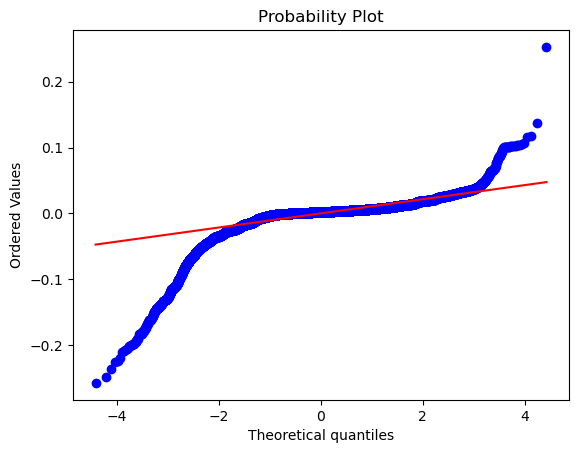

In [142]:
# Check normality of residuals
resids = ytest - y_pred_test

stats.probplot(resids, plot=plt)


plt.show()

In [76]:
from sklearn.linear_model import Ridge, Lasso,ElasticNet

### Ridge

In [77]:
rg = Ridge()

rg.fit(xtrain, ytrain)

y_pred_train = rg.predict(xtrain)
y_pred_test = rg.predict(xtest)

train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.9282119224881547
Test R2   0.9269630941523828
train RMSE  0.013369730386839954
test RMSE   0.013492367512514099


In [78]:
linear_results['Model'].append('Ridge')
linear_results['Train R2'].append(train_r2)
linear_results['Test R2'].append(test_r2)
linear_results['Train RMSE'].append(train_rmse)
linear_results['Test RMSE'].append(test_rmse)

### Lasso

In [79]:
la = Lasso()

la.fit(xtrain, ytrain)

y_pred_train = la.predict(xtrain)
y_pred_test = la.predict(xtest)

train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.0
Test R2   -2.472330944747192e-05
train RMSE  0.04989953376965157
test RMSE   0.049925491331028304


### ElasticNet

In [80]:
En=ElasticNet()


En.fit(xtrain, ytrain)

y_pred_train = En.predict(xtrain)
y_pred_test = En.predict(xtest)

train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.0
Test R2   -2.472330944747192e-05
train RMSE  0.04989953376965157
test RMSE   0.049925491331028304


### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)

y_pred_train = dtr.predict(xtrain)
y_pred_test = dtr.predict(xtest)

train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.99886110847049
Test R2   0.9361201384834584
train RMSE  0.0016839828696457674
test RMSE   0.01261824518819526


In [83]:
linear_results['Model'].append('Decision_tree')
linear_results['Train R2'].append(train_r2)
linear_results['Test R2'].append(test_r2)
linear_results['Train RMSE'].append(train_rmse)
linear_results['Test RMSE'].append(test_rmse)

### Random_Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)

y_pred_train = rfr.predict(xtrain)
y_pred_test = rfr.predict(xtest)

train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.9940755056234177
Test R2   0.9629630609532405
train RMSE  0.0038408038974216737
test RMSE   0.009608033805652148


In [86]:
linear_results['Model'].append('Random_Forest')
linear_results['Train R2'].append(train_r2)
linear_results['Test R2'].append(test_r2)
linear_results['Train RMSE'].append(train_rmse)
linear_results['Test RMSE'].append(test_rmse)

### Xgboost

In [87]:
from xgboost import XGBRegressor

In [88]:
xgbr = XGBRegressor()
xgbr.fit(xtrain, ytrain)

y_pred_train = xgbr.predict(xtrain)
y_pred_test = xgbr.predict(xtest)

train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.9651105491004749
Test R2   0.9578145824173985
train RMSE  0.009320593234506565
test RMSE   0.010254114327470136


In [89]:
linear_results['Model'].append('XGBRegressor')
linear_results['Train R2'].append(train_r2)
linear_results['Test R2'].append(test_r2)
linear_results['Train RMSE'].append(train_rmse)
linear_results['Test RMSE'].append(test_rmse)

In [90]:
linear_results = pd.DataFrame(linear_results)
linear_results

,Model,Train R2,Test R2,Train RMSE,Test RMSE
0,Linear_Regression,0.928214,0.926958,0.013370,0.013493
1,Ridge,0.928212,0.926963,0.013370,0.013492
2,Decision_tree,0.998861,0.936120,0.001684,0.012618
3,Random_Forest,0.994076,0.962963,0.003841,0.009608
4,XGBRegressor,0.965111,0.957815,0.009321,0.010254


In [91]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [92]:
lr=LinearRegression()
sfs_lr=sfs(estimator=lr,k_features='best',forward=True)

sfs_forward=sfs_lr.fit(xtrain,ytrain)
forward=list(sfs_forward.k_feature_names_)
forward

['AGE',
 'PREAUTH_AMT',
 'DAYS_STAYED',
 'SEX',
 'CASTE_NAME',
 'CATEGORY_NAME',
 'DISTRICT_NAME',
 'HOSP_TYPE',
 'HOSP_DISTRICT',
 'Mortality Y / N',
 'SRC_REGISTRATION',
 'PREAUTH_YEAR',
 'CLAIM_YEAR',
 'DISCHARGE_YEAR']

In [93]:
xtrain.drop(columns='CASTE_NAME',inplace=True)
xtest.drop(columns='CASTE_NAME',inplace=True)


In [94]:
lrr=LinearRegression()
lrr.fit(xtrain,ytrain)

LinearRegression()

In [95]:
lrr.score(xtrain,ytrain)

0.9282129091638777

In [96]:
lrr.score(xtest,ytest)

0.9269616592369205

In [97]:
train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

train RMSE  0.009320593234506565
test RMSE   0.010254114327470136


In [98]:
xtrain.shape

(335781, 14)

# Linear Classification

In [99]:
# adding category column

In [100]:
df_insurance1=df_insurance.copy()

In [101]:
df_insurance1.head()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED,SEX,CASTE_NAME,CATEGORY_NAME,DISTRICT_NAME,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,Mortality Y / N,SRC_REGISTRATION,PREAUTH_DATE,CLAIM_DATE,DISCHARGE_DATE
0,0.523364,0.024029,0.021150,0.109643,9.67,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-03,2013-08-03,2013-09-07
1,0.345794,0.024029,0.021150,0.108322,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-06,2013-08-06,2013-09-09
2,0.467290,0.024029,0.022112,0.155878,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-09,2013-08-09,2013-10-18
3,0.420561,0.024029,0.021150,0.108322,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-24,2013-08-24,2013-09-27
4,0.504673,0.024029,0.021150,0.109643,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-28,2013-08-28,2013-10-02


In [102]:
q1=df['CLAIM_AMOUNT'].quantile(0.25)
q2=df['CLAIM_AMOUNT'].quantile(0.50)
q3=df['CLAIM_AMOUNT'].quantile(0.75)

In [103]:
q1,q2,q3

(12500.0, 23200.0, 30600.0)

In [104]:
def category(x):
    if x>=q3:
        return 2     # 2- High
    elif q3>x>q1:
        return 1     # 1-Medium
    else:
        return 0     # 0-Low
df_insurance1['CLAIM_AMOUNT_CATEGORY']=df['CLAIM_AMOUNT'].apply(category)       

Created a Category Column of Claim Amount in which  0 refers to Low, 1 Refers to Medium and 2 refers to High

In [105]:
df_insurance1.drop(columns='CLAIM_AMOUNT',inplace=True)

In [106]:
df_insurance1.skew()

AGE                     -0.574233
PREAUTH_AMT              2.826157
DAYS_STAYED              7.129508
SEX                     -0.390407
CASTE_NAME               1.487303
CATEGORY_NAME           -0.293228
DISTRICT_NAME            0.368170
HOSP_NAME                0.016526
HOSP_TYPE               -1.282982
HOSP_DISTRICT            0.963774
Mortality Y / N         -6.664268
SRC_REGISTRATION        -4.516182
CLAIM_AMOUNT_CATEGORY    0.159239
dtype: float64

In [107]:
df_insurance1.head()

,AGE,PREAUTH_AMT,DAYS_STAYED,SEX,CASTE_NAME,CATEGORY_NAME,DISTRICT_NAME,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,Mortality Y / N,SRC_REGISTRATION,PREAUTH_DATE,CLAIM_DATE,DISCHARGE_DATE,CLAIM_AMOUNT_CATEGORY
0,0.523364,0.024029,0.109643,9.67,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-03,2013-08-03,2013-09-07,0
1,0.345794,0.024029,0.108322,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-06,2013-08-06,2013-09-09,0
2,0.467290,0.024029,0.155878,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-09,2013-08-09,2013-10-18,0
3,0.420561,0.024029,0.108322,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-24,2013-08-24,2013-09-27,0
4,0.504673,0.024029,0.109643,9.97,9.83,9.44,9.83,9.6,9.69,9.95,9.85,9.85,2013-08-28,2013-08-28,2013-10-02,0


In [108]:
x=df_insurance1.drop(columns='CLAIM_AMOUNT_CATEGORY')
y=df_insurance1['CLAIM_AMOUNT_CATEGORY']
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(x,y,test_size=0.30)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [110]:
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
# Assuming 'PREAUTH_DATE' is a datetime column in x_train
Xtrain1['PREAUTH_YEAR'] = Xtrain1['PREAUTH_DATE'].dt.year

# Drop the original datetime column if needed
Xtrain1 = Xtrain1.drop(columns=['PREAUTH_DATE'])

# Convert the new 'PREAUTH_YEAR' column to integer
Xtrain1['PREAUTH_YEAR'] = Xtrain1['PREAUTH_YEAR'].astype(int)


In [112]:

# Repeat for 'CLAIM_DATE'
Xtrain1['CLAIM_YEAR'] = Xtrain1['CLAIM_DATE'].dt.year
Xtrain1 = Xtrain1.drop(columns=['CLAIM_DATE'])
Xtrain1['CLAIM_YEAR'] = Xtrain1['CLAIM_YEAR'].astype(int)


In [113]:



# Repeat for 'DISCHARGE_DATE'
Xtrain1['DISCHARGE_YEAR'] = Xtrain1['DISCHARGE_DATE'].dt.year
Xtrain1 = Xtrain1.drop(columns=['DISCHARGE_DATE'])
Xtrain1['DISCHARGE_YEAR'] = Xtrain1['DISCHARGE_YEAR'].astype(int)


In [114]:
# Assuming 'PREAUTH_DATE' is a datetime column in x_train
Xtest1['PREAUTH_YEAR'] = Xtest1['PREAUTH_DATE'].dt.year

# Drop the original datetime column if needed
Xtest1 = Xtest1.drop(columns=['PREAUTH_DATE'])

# Convert the new 'PREAUTH_YEAR' column to integer
Xtest1['PREAUTH_YEAR'] = Xtest1['PREAUTH_YEAR'].astype(int)


In [115]:

# Repeat for 'CLAIM_DATE'
Xtest1['CLAIM_YEAR'] = Xtest1['CLAIM_DATE'].dt.year
Xtest1 = Xtest1.drop(columns=['CLAIM_DATE'])
Xtest1['CLAIM_YEAR'] = Xtest1['CLAIM_YEAR'].astype(int)


In [116]:



# Repeat for 'DISCHARGE_DATE'
Xtest1['DISCHARGE_YEAR'] = Xtest1['DISCHARGE_DATE'].dt.year
Xtest1 = Xtest1.drop(columns=['DISCHARGE_DATE'])
Xtest1['DISCHARGE_YEAR'] = Xtest1['DISCHARGE_YEAR'].astype(int)


In [117]:
from sklearn.metrics import accuracy_score

In [118]:
def performance(model,x,y):
    y_pred=model.predict(x)
    print('Confusion mattrix')
    cm=confusion_matrix(y,y_pred)
    print(cm)
    print('Classification Report')
    print(classification_report(y,y_pred))
    

In [119]:
results = {'Model': [], 'Train Accuracy': [],  'Test Accuracy': []}

### Logistic Regression

In [120]:
lgr=LogisticRegression()
lgr.fit(Xtrain1,Ytrain1)
Model1 = "Logistic Regression"

In [121]:
y_pred_train1 = lgr.predict(Xtrain1)
y_pred_test1 = lgr.predict(Xtest1)

In [122]:
print(performance(lgr,Xtrain1,Ytrain1))
train_accuracy1 = accuracy_score(Ytrain1, y_pred_train1)
test_accuracy1 = accuracy_score(Ytest1, y_pred_test1)

Confusion mattrix
[[ 97224  17794   1478]
 [ 16695 110509   6383]
 [  7323  36646  41729]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82    116496
           1       0.67      0.83      0.74    133587
           2       0.84      0.49      0.62     85698

    accuracy                           0.74    335781
   macro avg       0.77      0.72      0.73    335781
weighted avg       0.76      0.74      0.74    335781

None


In [123]:
performance(lgr,Xtest1,Ytest1)

Confusion mattrix
[[41820  7590   673]
 [ 7135 47291  2766]
 [ 3102 15611 17919]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     50083
           1       0.67      0.83      0.74     57192
           2       0.84      0.49      0.62     36632

    accuracy                           0.74    143907
   macro avg       0.77      0.72      0.73    143907
weighted avg       0.76      0.74      0.74    143907



In [124]:
results['Model'].append(Model1)
results['Train Accuracy'].append(train_accuracy1)
results['Test Accuracy'].append(test_accuracy1)

### Decision Tree

In [125]:
dtc=DecisionTreeClassifier()
dtc.fit(Xtrain1,Ytrain1)
Model2 = "Decision Tree"

In [126]:
y_pred_train2 = dtc.predict(Xtrain1)
y_pred_test2 = dtc.predict(Xtest1)

In [127]:
train_accuracy2 = accuracy_score(Ytrain1, y_pred_train2)
test_accuracy2 = accuracy_score(Ytest1, y_pred_test2)

In [128]:
performance(dtc,Xtrain1,Ytrain1)

Confusion mattrix
[[116259    221     16]
 [   363 132868    356]
 [    25    846  84827]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    116496
           1       0.99      0.99      0.99    133587
           2       1.00      0.99      0.99     85698

    accuracy                           0.99    335781
   macro avg       0.99      0.99      0.99    335781
weighted avg       0.99      0.99      0.99    335781



In [129]:
performance(dtc,Xtest1,Ytest1)

Confusion mattrix
[[47561  2294   228]
 [ 2597 51431  3164]
 [  303  3360 32969]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     50083
           1       0.90      0.90      0.90     57192
           2       0.91      0.90      0.90     36632

    accuracy                           0.92    143907
   macro avg       0.92      0.92      0.92    143907
weighted avg       0.92      0.92      0.92    143907



In [130]:
results['Model'].append(Model2)
results['Train Accuracy'].append(train_accuracy2)
results['Test Accuracy'].append(test_accuracy2)

### Random Forest

In [131]:
Rfc=RandomForestClassifier()
Rfc.fit(Xtrain1,Ytrain1)
Model3 = "Random Forest"

In [132]:
y_pred_train3 = Rfc.predict(Xtrain1)
y_pred_test3 = Rfc.predict(Xtest1)

In [133]:
train_accuracy3 = accuracy_score(Ytrain1, y_pred_train3)
test_accuracy3 = accuracy_score(Ytest1, y_pred_test3)

In [134]:
performance(Rfc,Xtrain1,Ytrain1)

Confusion mattrix
[[115963    498     35]
 [    86 132909    592]
 [     4    615  85079]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    116496
           1       0.99      0.99      0.99    133587
           2       0.99      0.99      0.99     85698

    accuracy                           0.99    335781
   macro avg       0.99      0.99      0.99    335781
weighted avg       0.99      0.99      0.99    335781



In [135]:
performance(Rfc,Xtest1,Ytest1)

Confusion mattrix
[[47163  2667   253]
 [  818 53047  3327]
 [   48  2041 34543]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     50083
           1       0.92      0.93      0.92     57192
           2       0.91      0.94      0.92     36632

    accuracy                           0.94    143907
   macro avg       0.94      0.94      0.94    143907
weighted avg       0.94      0.94      0.94    143907



In [136]:
results['Model'].append(Model3)
results['Train Accuracy'].append(train_accuracy3)
results['Test Accuracy'].append(test_accuracy3)

### AdaBoost

In [137]:
ad=AdaBoostClassifier()
ad.fit(Xtrain1,Ytrain1)
Model4 = "AdaBoost Classifier"

In [138]:
y_pred_train4 = ad.predict(Xtrain1)
y_pred_test4 = ad.predict(Xtest1)

In [139]:
train_accuracy4 = accuracy_score(Ytrain1, y_pred_train4)
test_accuracy4 = accuracy_score(Ytest1, y_pred_test4)

In [140]:
performance(ad,Xtrain1,Ytrain1)

Confusion mattrix
[[107022   8583    891]
 [   156 121594  11837]
 [    66   4791  80841]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    116496
           1       0.90      0.91      0.91    133587
           2       0.86      0.94      0.90     85698

    accuracy                           0.92    335781
   macro avg       0.92      0.92      0.92    335781
weighted avg       0.93      0.92      0.92    335781



In [141]:
performance(ad,Xtest1,Ytest1)

Confusion mattrix
[[45970  3724   389]
 [   61 52089  5042]
 [   29  2114 34489]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     50083
           1       0.90      0.91      0.90     57192
           2       0.86      0.94      0.90     36632

    accuracy                           0.92    143907
   macro avg       0.92      0.92      0.92    143907
weighted avg       0.92      0.92      0.92    143907



In [142]:
results['Model'].append(Model4)
results['Train Accuracy'].append(train_accuracy4)
results['Test Accuracy'].append(test_accuracy4)

### MLPClassifier

In [143]:
mlp=MLPClassifier()
mlp.fit(Xtrain1,Ytrain1)
Model5 = "MLPClassifier"

In [144]:
y_pred_train5 = mlp.predict(Xtrain1)
y_pred_test5 = mlp.predict(Xtest1)

In [145]:
train_accuracy5 = accuracy_score(Ytrain1, y_pred_train5)
test_accuracy5 = accuracy_score(Ytest1, y_pred_test5)

In [146]:
performance(mlp,Xtrain1,Ytrain1)

Confusion mattrix
[[115565      0    931]
 [127455      0   6132]
 [ 30751      0  54947]]
Classification Report
              precision    recall  f1-score   support

           0       0.42      0.99      0.59    116496
           1       0.00      0.00      0.00    133587
           2       0.89      0.64      0.74     85698

    accuracy                           0.51    335781
   macro avg       0.44      0.54      0.45    335781
weighted avg       0.37      0.51      0.40    335781



In [147]:
performance(mlp,Xtest1,Ytest1)

Confusion mattrix
[[49676     0   407]
 [54593     0  2599]
 [13229     0 23403]]
Classification Report
              precision    recall  f1-score   support

           0       0.42      0.99      0.59     50083
           1       0.00      0.00      0.00     57192
           2       0.89      0.64      0.74     36632

    accuracy                           0.51    143907
   macro avg       0.44      0.54      0.45    143907
weighted avg       0.37      0.51      0.40    143907



In [148]:
results['Model'].append(Model5)
results['Train Accuracy'].append(train_accuracy5)
results['Test Accuracy'].append(test_accuracy5)

### XGBoost

In [149]:
xg=XGBClassifier()
xg.fit(Xtrain1,Ytrain1)
Model6 = "XGBoost"

In [150]:
y_pred_train6 = xg.predict(Xtrain1)
y_pred_test6 = xg.predict(Xtest1)

In [151]:
train_accuracy6 = accuracy_score(Ytrain1, y_pred_train6)
test_accuracy6 = accuracy_score(Ytest1, y_pred_test6)

In [152]:
performance(xg,Xtrain1,Ytrain1)


Confusion mattrix
[[110318   5551    627]
 [  1083 124189   8315]
 [    37   3576  82085]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    116496
           1       0.93      0.93      0.93    133587
           2       0.90      0.96      0.93     85698

    accuracy                           0.94    335781
   macro avg       0.94      0.94      0.94    335781
weighted avg       0.94      0.94      0.94    335781



In [153]:
performance(xg,Xtest1,Ytest1)

Confusion mattrix
[[47268  2542   273]
 [  602 52772  3818]
 [   26  1774 34832]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     50083
           1       0.92      0.92      0.92     57192
           2       0.89      0.95      0.92     36632

    accuracy                           0.94    143907
   macro avg       0.94      0.94      0.94    143907
weighted avg       0.94      0.94      0.94    143907



In [154]:
results['Model'].append(Model6)
results['Train Accuracy'].append(train_accuracy6)
results['Test Accuracy'].append(test_accuracy6)

### Result

In [155]:
df_results = pd.DataFrame(results)

In [156]:
df_results

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.742931,0.743744
1,Decision Tree,0.994559,0.916988
2,Random Forest,0.994550,0.936389
3,AdaBoost Classifier,0.921604,0.921067
4,MLPClassifier,0.507807,0.507821
5,XGBoost,0.942853,0.937216


1. Logistic Regression:
- Train Accuracy: 74.29%
- Test Accuracy: 74.37%
- Logistic Regression is a linear model. The accuracy suggests that the model performs reasonably well but may have limitations capturing complex relationships in the data.

2. Decision Tree:
- Train Accuracy: 99.45%
- Test Accuracy: 91.69%
- Decision Trees can be prone to overfitting. The high training accuracy suggests the model fits the training data well, but the lower test accuracy indicates lower overfitting when applied to new, unseen data.

3. Random Forest:
- Train Accuracy: 99.45%
- Test Accuracy: 93.63%
- Random Forest, an ensemble of Decision Trees, generally performs well. The model seems effective at capturing patterns in the training data and generalizing to unseen data, as reflected in the relatively high test accuracy.

4. AdaBoost Classifier:
- Train Accuracy: 92.16%
- Test Accuracy: 92.10%
- AdaBoost combines weak learners to create a strong model. The accuracies are balanced, indicating good performance on both the training and test sets.

5. MLPClassifier (Neural Network):
- Train Accuracy: 50.78%
- Test Accuracy: 89.78%
- The neural network achieved moderate accuracy, and there might be room for improvement through hyperparameter tuning or more complex architectures.

6. XGBoost:
- Train Accuracy: 94.28%
- Test Accuracy: 93.72%
- XGBoost is an ensemble method known for its robustness and performance. The model performs well on both the training and test sets.


# Randomized Search Cv For RandomForest ClassiFier

In [157]:
results1 = {'Model': [], 'Train Accuracy': [],  'Test Accuracy': []}

In [158]:
from sklearn.model_selection import RandomizedSearchCV

In [159]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                    'n_estimators': [10, 30, 50, 70, 90],
                    'max_depth': [10, 15, 20],
                    'min_samples_split': [2, 5, 8, 11]}]

In [160]:
rfc_random=RandomizedSearchCV(estimator=Rfc,param_distributions=tuned_paramaters,cv=5)
rfc_model=rfc_random.fit(Xtrain1,Ytrain1)
print(rfc_model.best_params_)

{'n_estimators': 70, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'gini'}


In [161]:
rfc=RandomForestClassifier(**rfc_model.best_params_,random_state=10)
rfc.fit(Xtrain1,Ytrain1)
Model1='Random Forest'

In [162]:
y_pred_train1 = rfc.predict(Xtrain1)
y_pred_test1 = rfc.predict(Xtest1)

In [163]:
train_accuracy1 = accuracy_score(Ytrain1, y_pred_train1)
test_accuracy1 = accuracy_score(Ytest1, y_pred_test1)

In [164]:
performance(rfc,Xtrain1,Ytrain1)

Confusion mattrix
[[111598   4532    366]
 [    88 128689   4810]
 [    12   1575  84111]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    116496
           1       0.95      0.96      0.96    133587
           2       0.94      0.98      0.96     85698

    accuracy                           0.97    335781
   macro avg       0.97      0.97      0.97    335781
weighted avg       0.97      0.97      0.97    335781



In [165]:
performance(rfc,Xtest1,Ytest1)

Confusion mattrix
[[46782  3012   289]
 [  378 52986  3828]
 [   29  1637 34966]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     50083
           1       0.92      0.93      0.92     57192
           2       0.89      0.95      0.92     36632

    accuracy                           0.94    143907
   macro avg       0.94      0.94      0.94    143907
weighted avg       0.94      0.94      0.94    143907



In [166]:
results1['Model'].append(Model1)
results1['Train Accuracy'].append(train_accuracy1)
results1['Test Accuracy'].append(test_accuracy1)

# RandomizedSearchCV For Logistic Regression

In [167]:
from scipy.stats import uniform

In [168]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(loc=0, scale=4)}

In [169]:
random_search = RandomizedSearchCV(estimator=lgr, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42)

lgr_random=random_search.fit(Xtrain1,Ytrain1)
print(lgr_random.best_params_)

{'C': 0.7337391594646552, 'penalty': 'none'}


In [170]:
lgr_model=LogisticRegression(**lgr_random.best_params_,random_state=10)
lgr_model.fit(Xtrain1,Ytrain1)
Model2='Logistic Regression'

In [171]:
y_pred_train2 = lgr_model.predict(Xtrain1)
y_pred_test2 = lgr_model.predict(Xtest1)

In [172]:
train_accuracy2 = accuracy_score(Ytrain1, y_pred_train2)
test_accuracy2= accuracy_score(Ytest1, y_pred_test2)

In [173]:
performance(lgr_model,Xtrain1,Ytrain1)

Confusion mattrix
[[ 97243  17776   1477]
 [ 16751 110454   6382]
 [  7362  36606  41730]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82    116496
           1       0.67      0.83      0.74    133587
           2       0.84      0.49      0.62     85698

    accuracy                           0.74    335781
   macro avg       0.77      0.72      0.72    335781
weighted avg       0.76      0.74      0.74    335781



In [174]:
performance(lgr_model,Xtest1,Ytest1)

Confusion mattrix
[[41832  7578   673]
 [ 7148 47278  2766]
 [ 3116 15596 17920]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     50083
           1       0.67      0.83      0.74     57192
           2       0.84      0.49      0.62     36632

    accuracy                           0.74    143907
   macro avg       0.77      0.72      0.73    143907
weighted avg       0.76      0.74      0.74    143907



In [175]:
results1['Model'].append(Model2)
results1['Train Accuracy'].append(train_accuracy2)
results1['Test Accuracy'].append(test_accuracy2)

# RandomizedSearchCV For DecisionTree Classifier

In [176]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split':[2,5,8,11],
    'min_samples_leaf': [2,3,5]}

In [177]:
dtc_random=RandomizedSearchCV(estimator=dtc,param_distributions=param_dist,cv=5)
dtc_model=dtc_random.fit(Xtrain1,Ytrain1)
print(dtc_model.best_params_)

{'min_samples_split': 11, 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'entropy'}


In [178]:
DTC=DecisionTreeClassifier(**dtc_model.best_params_,random_state=10)
DTC.fit(Xtrain1,Ytrain1)
Model3='Decision Tree'

In [179]:
y_pred_train3 = DTC.predict(Xtrain1)
y_pred_test3 = DTC.predict(Xtest1)

In [180]:
train_accuracy3 = accuracy_score(Ytrain1, y_pred_train3)
test_accuracy3= accuracy_score(Ytest1, y_pred_test3)

In [181]:
performance(DTC,Xtrain1,Ytrain1)

Confusion mattrix
[[111283   4750    463]
 [  1475 124272   7840]
 [   128   3900  81670]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    116496
           1       0.93      0.93      0.93    133587
           2       0.91      0.95      0.93     85698

    accuracy                           0.94    335781
   macro avg       0.94      0.95      0.94    335781
weighted avg       0.95      0.94      0.94    335781



In [182]:
performance(DTC,Xtest1,Ytest1)

Confusion mattrix
[[47412  2404   267]
 [  960 52471  3761]
 [  109  2046 34477]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     50083
           1       0.92      0.92      0.92     57192
           2       0.90      0.94      0.92     36632

    accuracy                           0.93    143907
   macro avg       0.93      0.94      0.93    143907
weighted avg       0.93      0.93      0.93    143907



In [183]:
results1['Model'].append(Model3)
results1['Train Accuracy'].append(train_accuracy3)
results1['Test Accuracy'].append(test_accuracy3)

# Results

In [184]:
df_results1 = pd.DataFrame(results1)

In [185]:
df_results1

,Model,Train Accuracy,Test Accuracy
0,Random Forest,0.966100,0.936257
1,Logistic Regression,0.742826,0.743744
2,Decision Tree,0.944738,0.933659


After applying RandomizedSearchCV, it seems that the model performances have not significantly changed compared to their original accuracy scores. RandomizedSearchCV is a technique used for hyperparameter tuning, which helps in finding the optimal parameters for a machine learning model.

1. Random Forest
- Train Accuracy: 96.61%
- Test Accuracy: 93.62%

The model Random Forest achieved a train accuracy of 96.61% and a test accuracy of 93.63%. This suggests that the Random Forest model performed well on both the training and test datasets. 

2. Logistic Regression:
- Train Accuracy: 74.28%
- Test Accuracy: 74.37%
 
The logistic regression model achieved a moderate accuracy score of around 74% on both the training and test datasets. This suggests that the model may be underfitting slightly, as its performance on the training set is not substantially higher than its performance on the test set.

3. Decision Tree:

- Train Accuracy: 94.47%
- Test Accuracy: 93.37%

The decision tree model performed significantly better than logistic regression, achieving approximately 94.47% accuracy on the training set and 93.37% accuracy on the test set. 

### Overall Interpretation:

- Decision Tree and Random Forest show high training accuracy, but Random Forest generalizes better to the test set, likely due to its ensemble nature.
- XGBoost also performs well, showcasing the strength of gradient boosting algorithms.
- Logistic Regression, AdaBoost, and MLPClassifier have moderate accuracies, suggesting room for improvement or exploration of other models.
- It's important to consider factors like the nature of the problem, the balance of the dataset, and potential overfitting when interpreting these results. Additionally, fine-tuning hyperparameters and exploring model-specific metrics can provide deeper insights into model performance.
